In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [502]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("firedmosquito831/student-academic-performance-simulation-4000")

print("Path to dataset files:", path)

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(path, filename)
        break

Path to dataset files: /kaggle/input/student-academic-performance-simulation-4000


In [503]:
df = pd.read_csv(csv_path)

In [504]:
df.shape

(4000, 7)

In [505]:
df.size

28000

In [506]:
df.head()

Gender  HoursStudied/Week Tutoring Region  Attendance(%) Parent Education  \
0    Male                5.5       No  Urban           72.7         Tertiary   
1  Female                6.8       No  Urban           62.0          Primary   
2  Female                9.7       No  Rural           95.0        Secondary   
3    Male               13.3      Yes  Rural           52.9              NaN   
4  Female                8.9       No  Urban           50.8              NaN   

   Exam_Score  
0        43.5  
1        51.7  
2        70.1  
3        79.5  
4        52.2

In [507]:
df.tail()

Gender  HoursStudied/Week Tutoring Region  Attendance(%)  \
3995    Male               11.3      Yes  Urban           79.5   
3996    Male                3.7      Yes  Urban           50.7   
3997  Female                0.0       No  Rural           72.7   
3998    Male                4.0       No  Urban           62.2   
3999    Male                7.8       No  Rural           79.6   

     Parent Education  Exam_Score  
3995        Secondary        93.5  
3996         Tertiary        53.8  
3997         Tertiary        25.4  
3998         Tertiary        40.3  
3999          Primary        62.0

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [509]:
df.describe()

HoursStudied/Week  Attendance(%)   Exam_Score
count        4000.000000    4000.000000  4000.000000
mean            9.861025      75.224150    71.107775
std             3.713801      14.496906    16.748950
min             0.000000      50.000000    16.600000
25%             7.400000      62.600000    59.300000
50%             9.900000      75.600000    71.550000
75%            12.600000      87.700000    83.500000
max            16.000000     100.000000   100.000000

In [510]:
df.columns

Index(['Gender', 'HoursStudied/Week', 'Tutoring', 'Region', 'Attendance(%)',
       'Parent Education', 'Exam_Score'],
      dtype='object')

In [511]:
df.nunique()

Gender                 2
HoursStudied/Week    159
Tutoring               2
Region                 2
Attendance(%)        500
Parent Education       3
Exam_Score           680
dtype: int64

In [512]:
df['Parent Education'].unique()

array(['Tertiary', 'Primary', 'Secondary', nan], dtype=object)

In [513]:
df.isnull().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

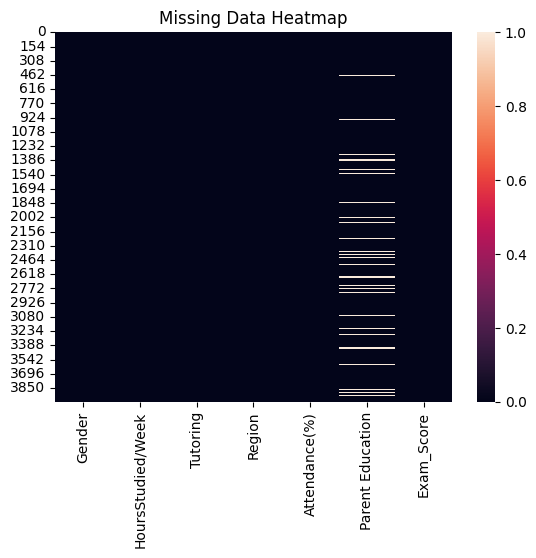

In [514]:
#Visualise missing data
sns.heatmap(df.isnull())
plt.title('Missing Data Heatmap')
plt.show()

In [515]:
# Perform imputation (mode method for categorical data) since the column is important and we cannot drop it as the NAN are less than 50% of the column data.
df['Parent Education'].fillna(df['Parent Education'].mode()[0], inplace=True)

/tmp/ipython-input-515-3750593694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent Education'].fillna(df['Parent Education'].mode()[0], inplace=True)


In [516]:
df.head()

Gender  HoursStudied/Week Tutoring Region  Attendance(%) Parent Education  \
0    Male                5.5       No  Urban           72.7         Tertiary   
1  Female                6.8       No  Urban           62.0          Primary   
2  Female                9.7       No  Rural           95.0        Secondary   
3    Male               13.3      Yes  Rural           52.9        Secondary   
4  Female                8.9       No  Urban           50.8        Secondary   

   Exam_Score  
0        43.5  
1        51.7  
2        70.1  
3        79.5  
4        52.2

In [517]:
#Checikng again after imputating the Parent Education column if there are still columns with NAN values
df.isnull().sum()

Gender               0
HoursStudied/Week    0
Tutoring             0
Region               0
Attendance(%)        0
Parent Education     0
Exam_Score           0
dtype: int64

In [518]:
#Checking the summary statistics of our data.
df.describe()

HoursStudied/Week  Attendance(%)   Exam_Score
count        4000.000000    4000.000000  4000.000000
mean            9.861025      75.224150    71.107775
std             3.713801      14.496906    16.748950
min             0.000000      50.000000    16.600000
25%             7.400000      62.600000    59.300000
50%             9.900000      75.600000    71.550000
75%            12.600000      87.700000    83.500000
max            16.000000     100.000000   100.000000

In [519]:
# Relationship analysis


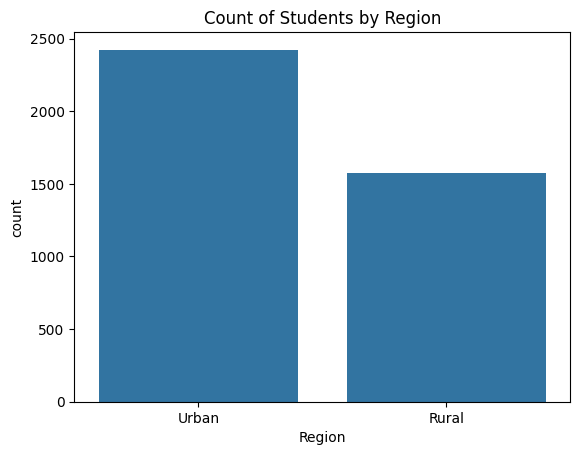

In [520]:
sns.countplot(data=df, x='Region')
plt.title('Count of Students by Region')
plt.show()

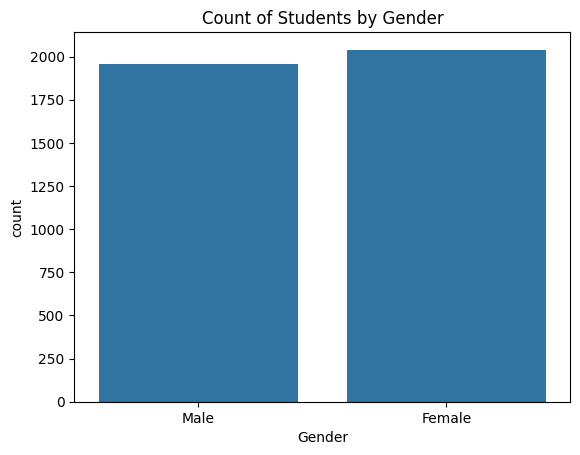

In [521]:
sns.countplot(data=df, x='Gender')
plt.title('Count of Students by Gender')
plt.show()

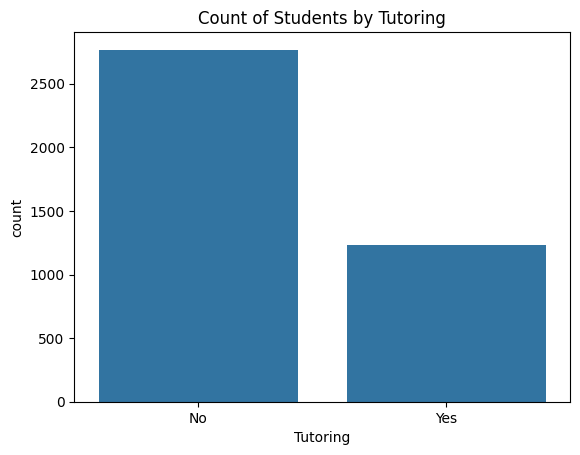

In [522]:
sns.countplot(data=df, x='Tutoring')
plt.title('Count of Students by Tutoring')
plt.show()

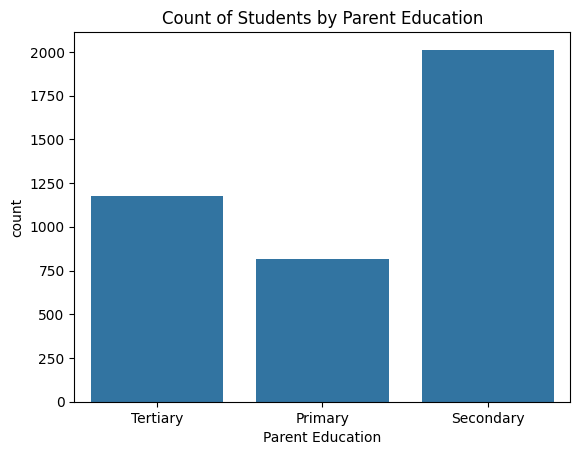

In [523]:
sns.countplot(data=df, x='Parent Education')
plt.title('Count of Students by Parent Education')
plt.show()

In [524]:
correlation = df.select_dtypes(include=['number']).corr()

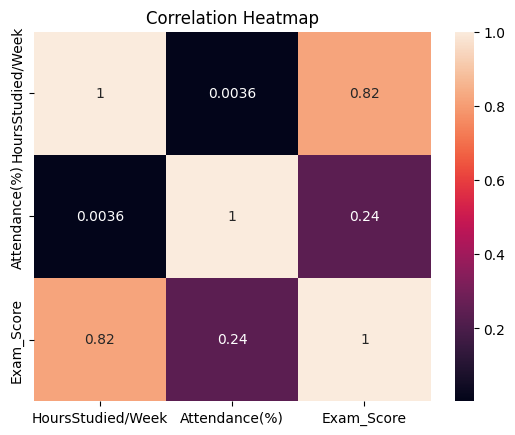

In [525]:
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [526]:
# From the heatmap, we do not drop any column as there is no issue of multi-collinearity.

In [527]:
df.head()

Gender  HoursStudied/Week Tutoring Region  Attendance(%) Parent Education  \
0    Male                5.5       No  Urban           72.7         Tertiary   
1  Female                6.8       No  Urban           62.0          Primary   
2  Female                9.7       No  Rural           95.0        Secondary   
3    Male               13.3      Yes  Rural           52.9        Secondary   
4  Female                8.9       No  Urban           50.8        Secondary   

   Exam_Score  
0        43.5  
1        51.7  
2        70.1  
3        79.5  
4        52.2

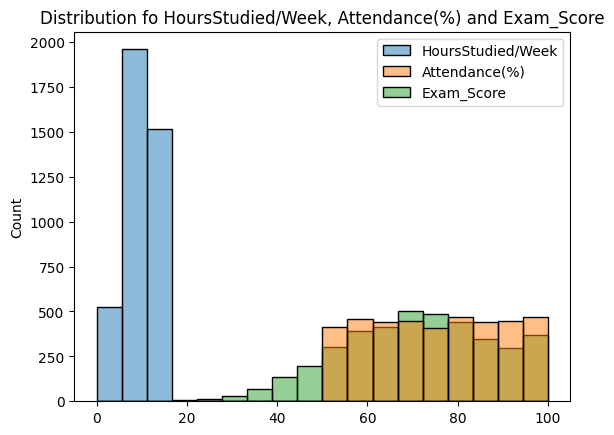

In [528]:
sns.histplot(df)
plt.title('Distribution fo HoursStudied/Week, Attendance(%) and Exam_Score')
plt.show()

/tmp/ipython-input-529-1157723682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Exam_Score'])


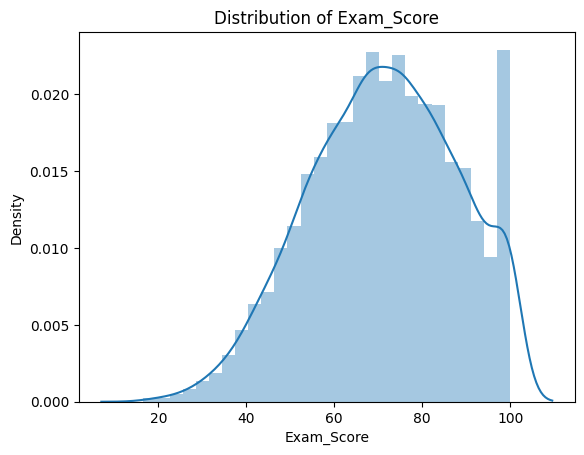

In [529]:
sns.distplot(df['Exam_Score'])
plt.title("Distribution of Exam_Score")
plt.show()

/tmp/ipython-input-530-1356893120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HoursStudied/Week'])


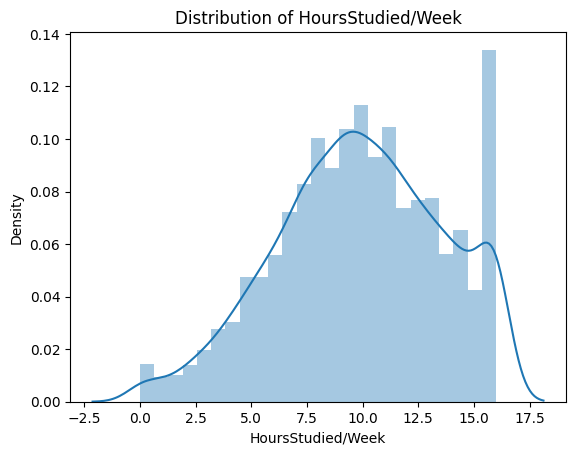

In [530]:
sns.distplot(df['HoursStudied/Week'])
plt.title("Distribution of HoursStudied/Week")
plt.show()

/tmp/ipython-input-531-3419411915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Attendance(%)'])


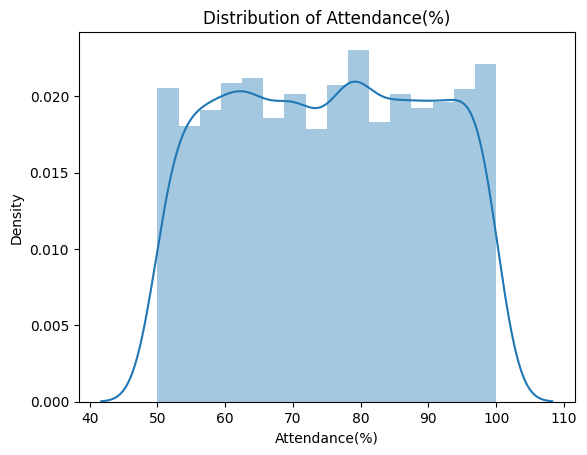

In [531]:
sns.distplot(df['Attendance(%)'])
plt.title("Distribution of Attendance(%)")
plt.show()

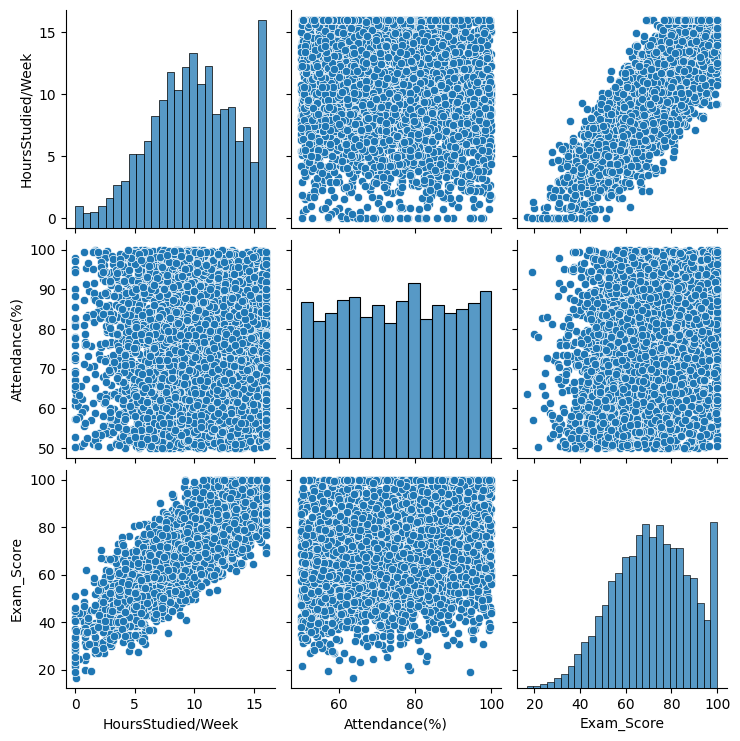

In [532]:
sns.pairplot(df)

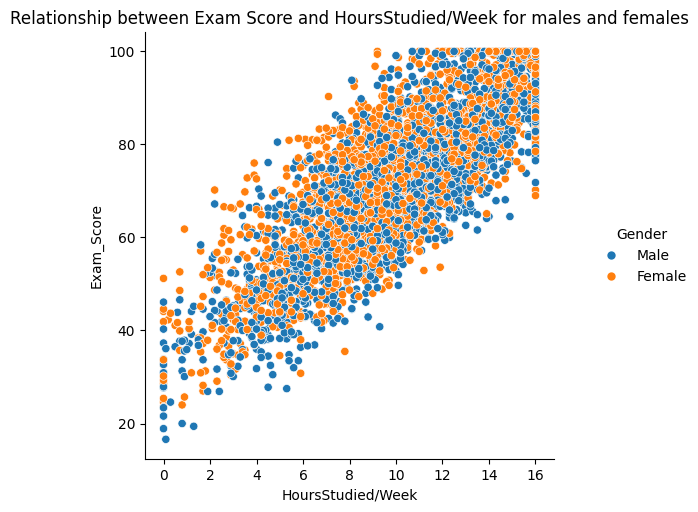

In [533]:
sns.relplot(x='HoursStudied/Week', y='Exam_Score',hue='Gender', data=df)
plt.title("Relationship between Exam Score and HoursStudied/Week for males and females")
plt.show()

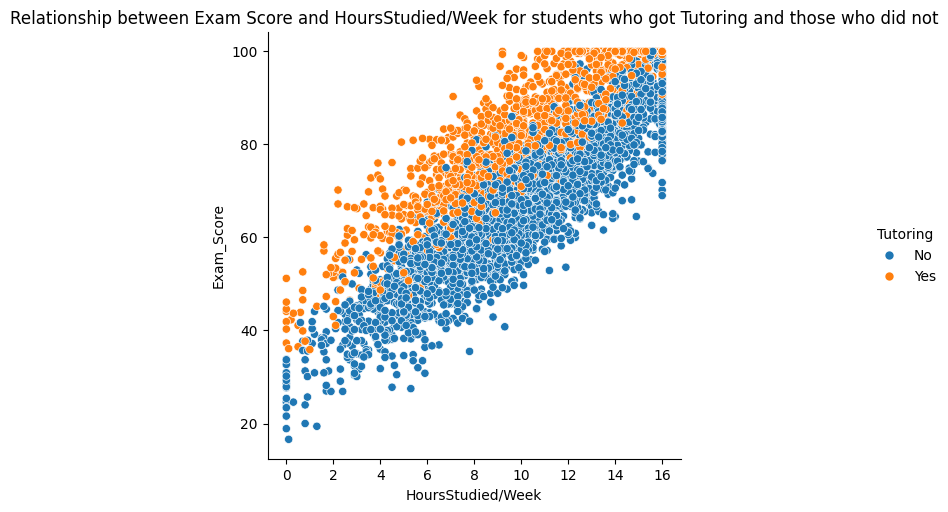

In [534]:
sns.relplot(x='HoursStudied/Week', y='Exam_Score',hue='Tutoring', data=df)
plt.title("Relationship between Exam Score and HoursStudied/Week for students who got Tutoring and those who did not")
plt.show()

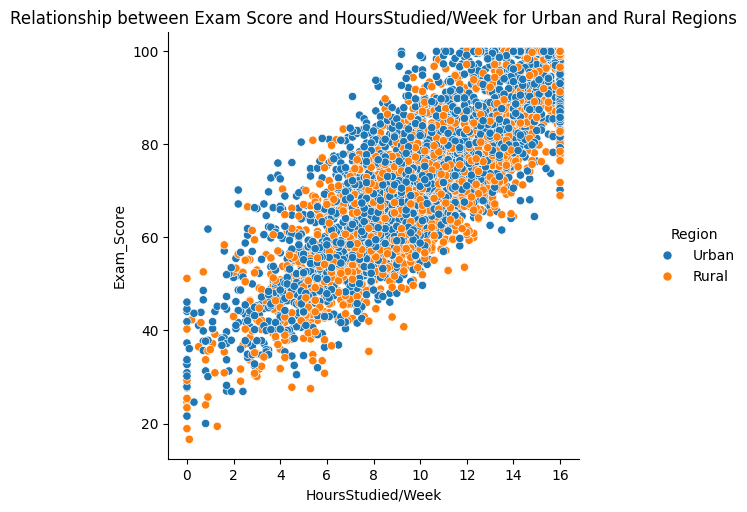

In [535]:
sns.relplot(x='HoursStudied/Week', y='Exam_Score',hue='Region', data=df)
plt.title("Relationship between Exam Score and HoursStudied/Week for Urban and Rural Regions")
plt.show()

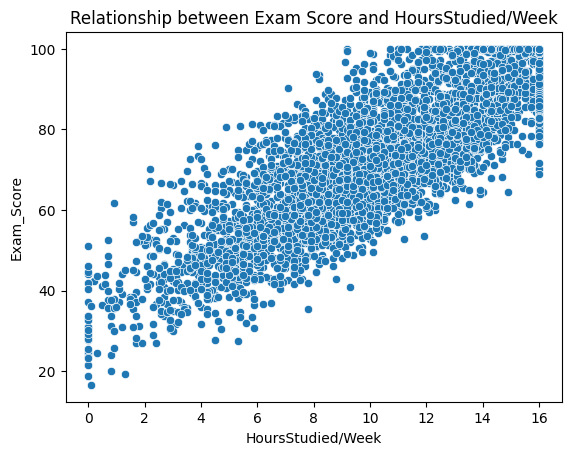

In [536]:
sns.scatterplot(x='HoursStudied/Week', y='Exam_Score', data=df)
plt.title("Relationship between Exam Score and HoursStudied/Week")
plt.show()

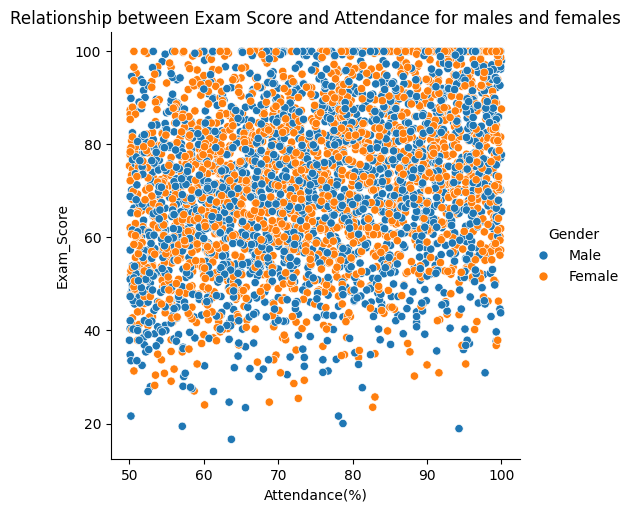

In [537]:
sns.relplot(x='Attendance(%)', y='Exam_Score',hue='Gender', data=df)
plt.title("Relationship between Exam Score and Attendance for males and females")
plt.show()

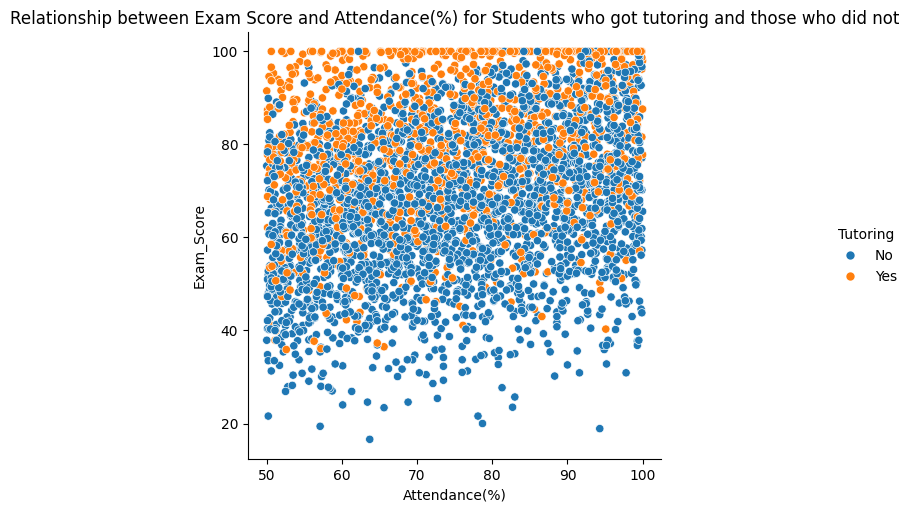

In [538]:
sns.relplot(x='Attendance(%)', y='Exam_Score',hue='Tutoring', data=df)
plt.title("Relationship between Exam Score and Attendance(%) for Students who got tutoring and those who did not")
plt.show()

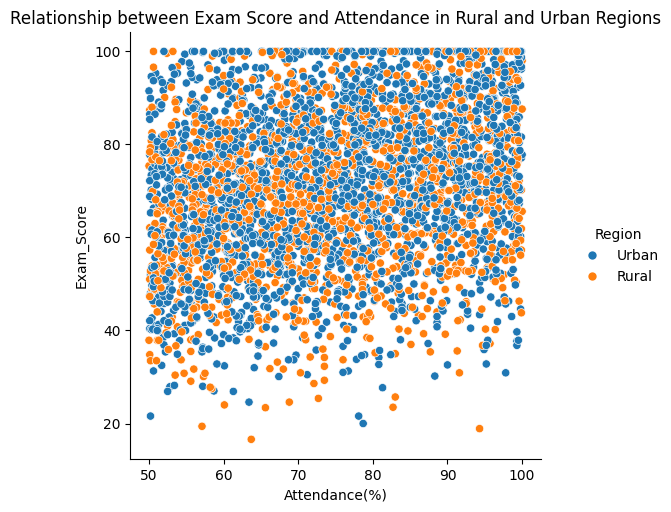

In [539]:
sns.relplot(x='Attendance(%)', y='Exam_Score',hue='Region', data=df)
plt.title("Relationship between Exam Score and Attendance in Rural and Urban Regions")
plt.show()

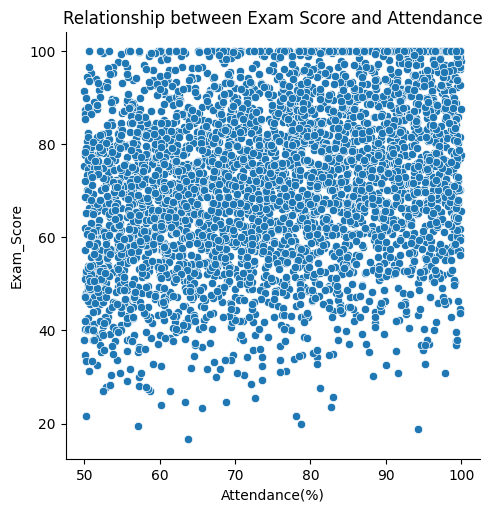

In [540]:
sns.relplot(x='Attendance(%)', y='Exam_Score', data=df)
plt.title("Relationship between Exam Score and Attendance")
plt.show()

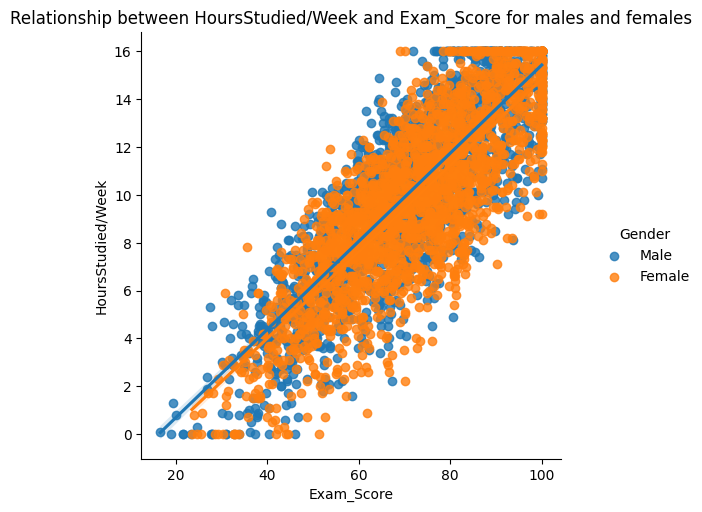

In [541]:
sns.lmplot(x='Exam_Score', y='HoursStudied/Week', hue='Gender', data=df)
plt.title('Relationship between HoursStudied/Week and Exam_Score for males and females')
plt.show()

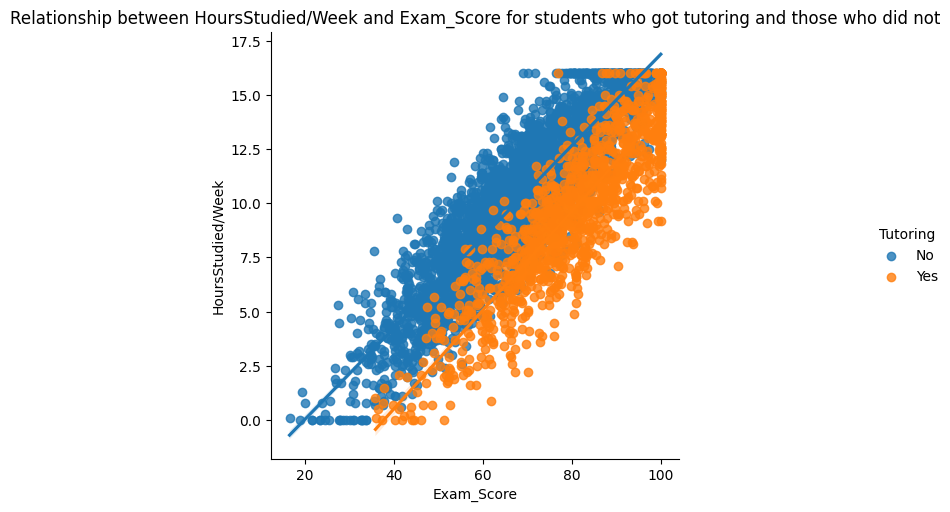

In [542]:
sns.lmplot(x='Exam_Score', y='HoursStudied/Week', hue='Tutoring', data=df)
plt.title('Relationship between HoursStudied/Week and Exam_Score for students who got tutoring and those who did not')
plt.show()

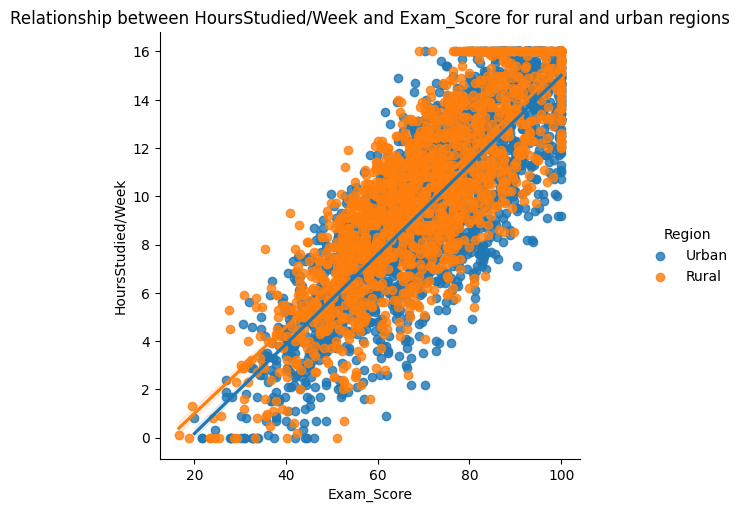

In [543]:
sns.lmplot(x='Exam_Score', y='HoursStudied/Week', hue='Region', data=df)
plt.title('Relationship between HoursStudied/Week and Exam_Score for rural and urban regions')
plt.show()

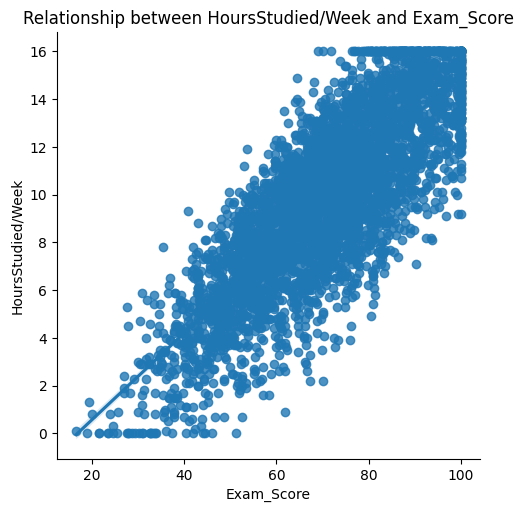

In [544]:
sns.lmplot(x='Exam_Score', y='HoursStudied/Week', data=df)
plt.title('Relationship between HoursStudied/Week and Exam_Score')
plt.show()

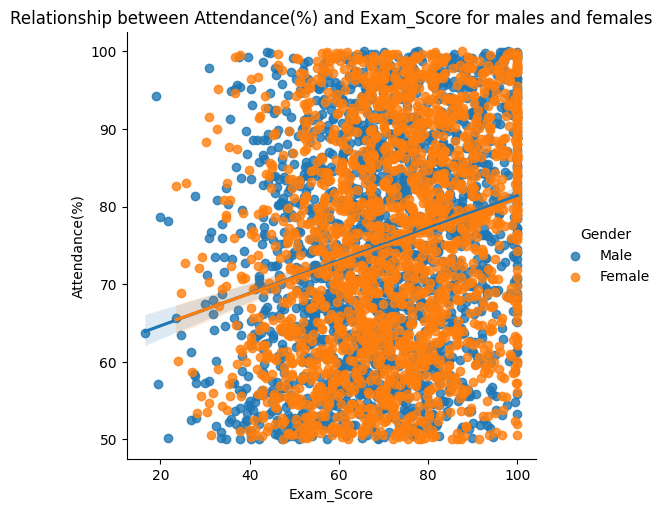

In [545]:
sns.lmplot(x='Exam_Score', y='Attendance(%)', hue='Gender', data=df)
plt.title('Relationship between Attendance(%) and Exam_Score for males and females')
plt.show()

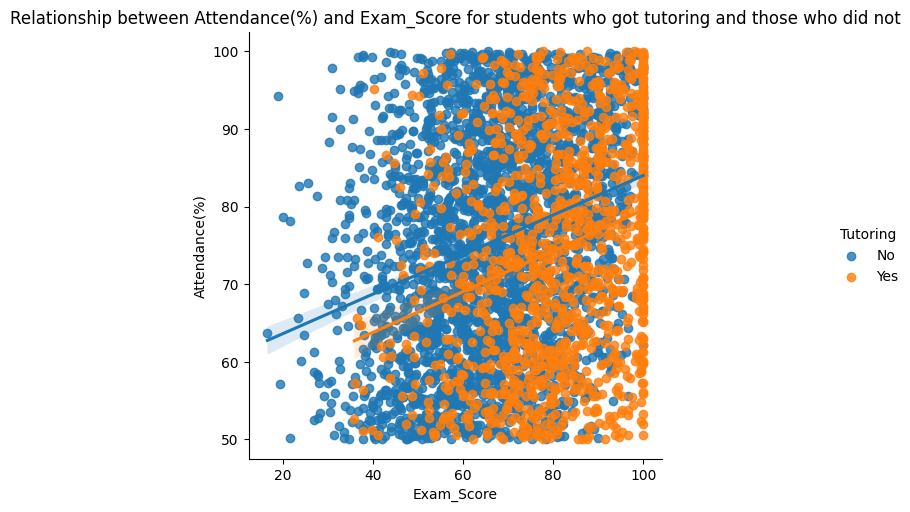

In [546]:
sns.lmplot(x='Exam_Score', y='Attendance(%)', hue='Tutoring', data=df)
plt.title('Relationship between Attendance(%) and Exam_Score for students who got tutoring and those who did not')
plt.show()

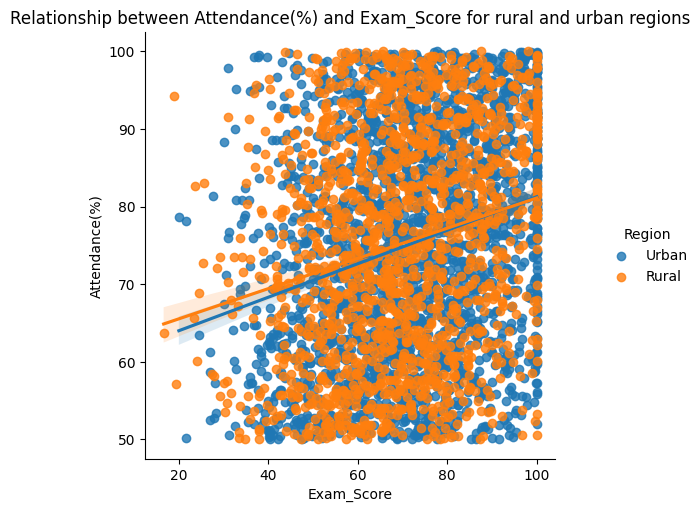

In [547]:
sns.lmplot(x='Exam_Score', y='Attendance(%)', hue='Region', data=df)
plt.title('Relationship between Attendance(%) and Exam_Score for rural and urban regions')
plt.show()

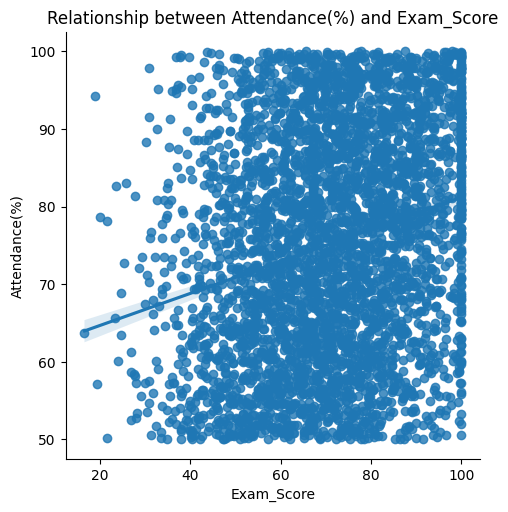

In [548]:
sns.lmplot(x='Exam_Score', y='Attendance(%)', data=df)
plt.title('Relationship between Attendance(%) and Exam_Score')
plt.show()

/tmp/ipython-input-549-105721112.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Gender'], shade=True)


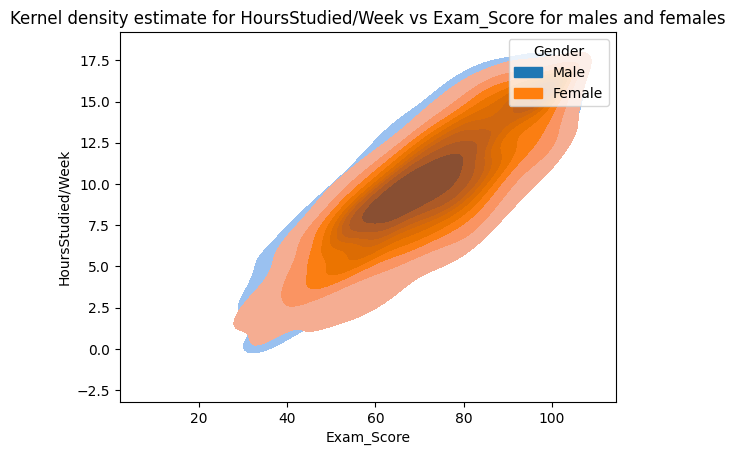

In [549]:
sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Gender'], shade=True)
plt.title('Kernel density estimate for HoursStudied/Week vs Exam_Score for males and females')
plt.show()

/tmp/ipython-input-550-2603417349.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Region'], shade=True)


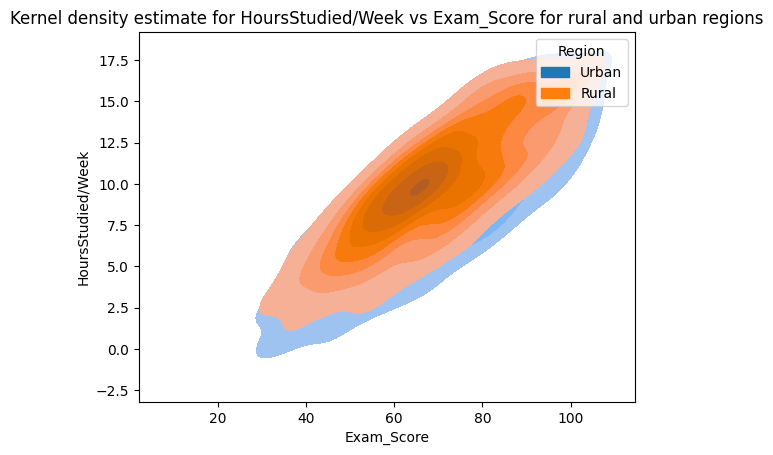

In [550]:
sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Region'], shade=True)
plt.title('Kernel density estimate for HoursStudied/Week vs Exam_Score for rural and urban regions')
plt.show()

/tmp/ipython-input-551-2092889060.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Tutoring'], shade=True)


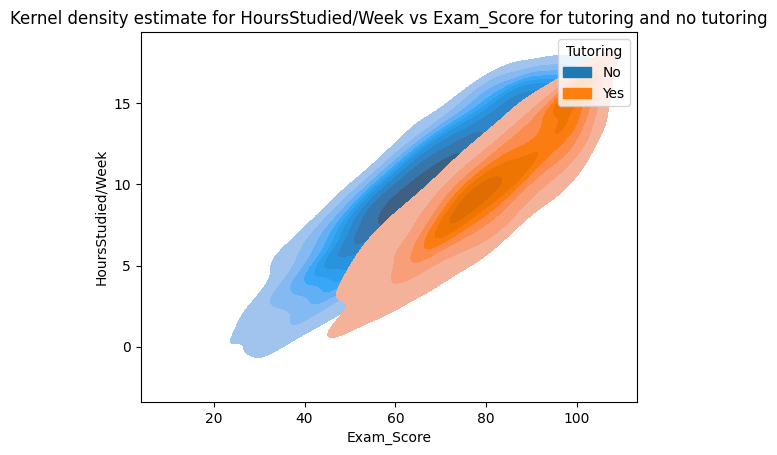

In [551]:
sns.kdeplot(x=df['Exam_Score'], y=df['HoursStudied/Week'],hue=df['Tutoring'], shade=True)
plt.title('Kernel density estimate for HoursStudied/Week vs Exam_Score for tutoring and no tutoring')
plt.show()

/tmp/ipython-input-552-2009903205.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Gender'], shade=True)


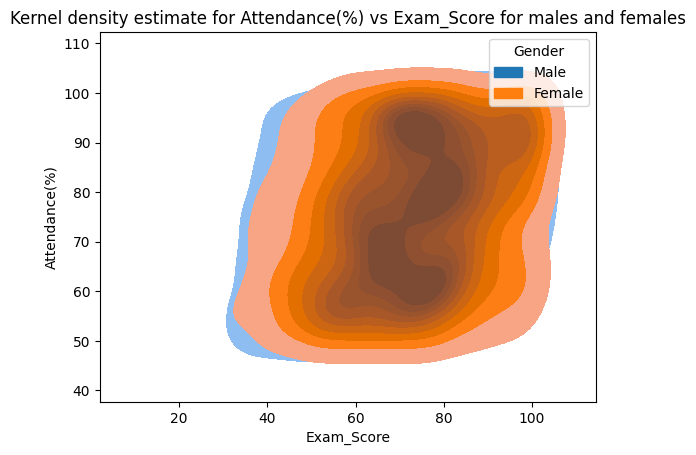

In [552]:
sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Gender'], shade=True)
plt.title('Kernel density estimate for Attendance(%) vs Exam_Score for males and females')
plt.show()

/tmp/ipython-input-553-474367021.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Region'], shade=True)


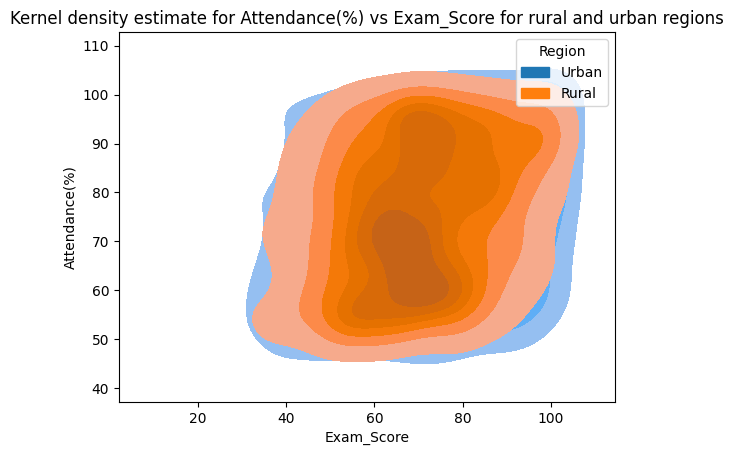

In [553]:
sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Region'], shade=True)
plt.title('Kernel density estimate for Attendance(%) vs Exam_Score for rural and urban regions')
plt.show()

/tmp/ipython-input-554-2783279117.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Tutoring'], shade=True)


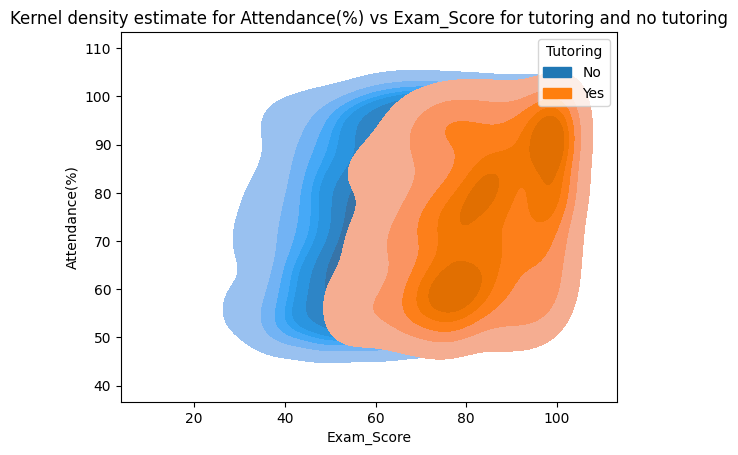

In [554]:
sns.kdeplot(x=df['Exam_Score'], y=df['Attendance(%)'],hue=df['Tutoring'], shade=True)
plt.title('Kernel density estimate for Attendance(%) vs Exam_Score for tutoring and no tutoring')
plt.show()

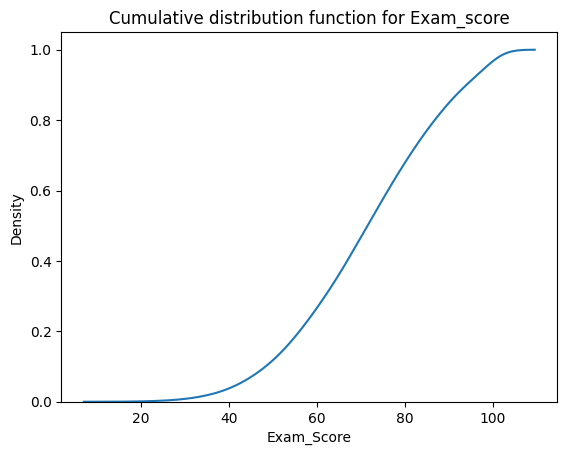

In [555]:
sns.kdeplot(df['Exam_Score'], cumulative=True)
plt.title('Cumulative distribution function for Exam_score')
plt.show()

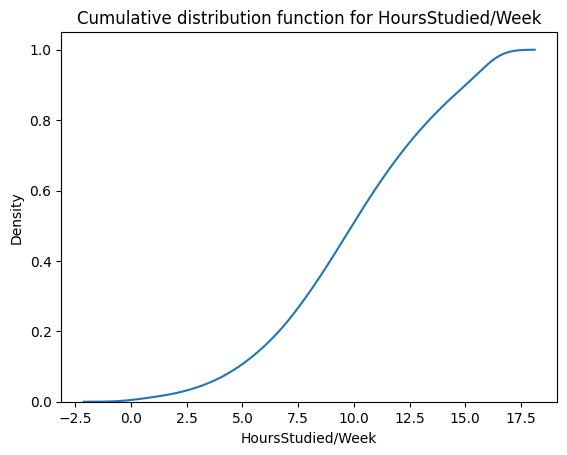

In [556]:
sns.kdeplot(df['HoursStudied/Week'], cumulative=True)
plt.title('Cumulative distribution function for HoursStudied/Week')
plt.show()

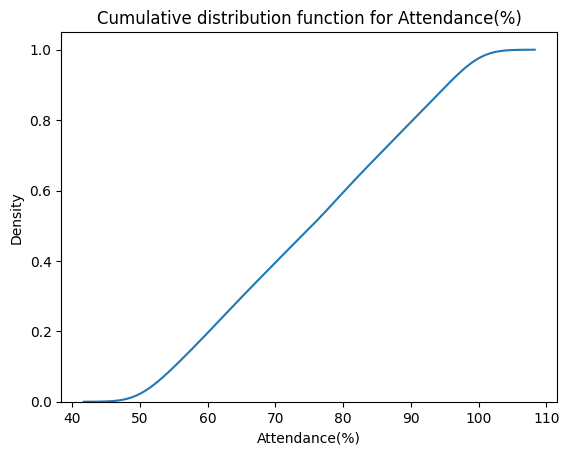

In [557]:
sns.kdeplot(df['Attendance(%)'], cumulative=True)
plt.title('Cumulative distribution function for Attendance(%)')
plt.show()

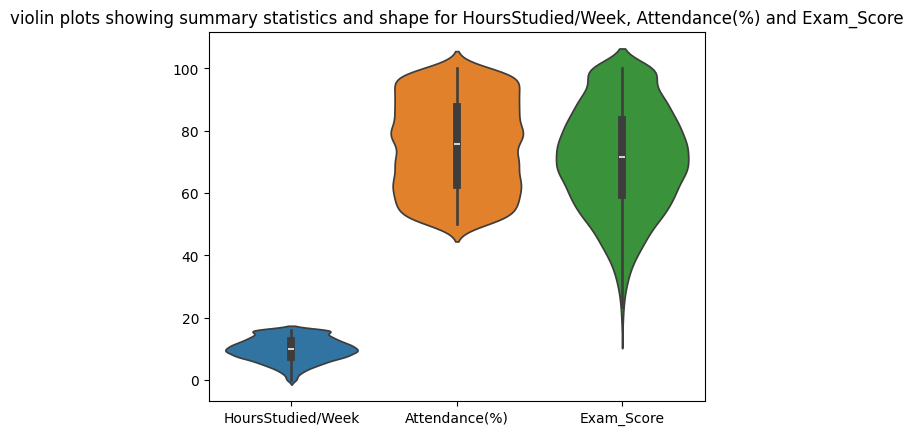

In [558]:
sns.violinplot(df)
plt.title('violin plots showing summary statistics and shape for HoursStudied/Week, Attendance(%) and Exam_Score')
plt.show()

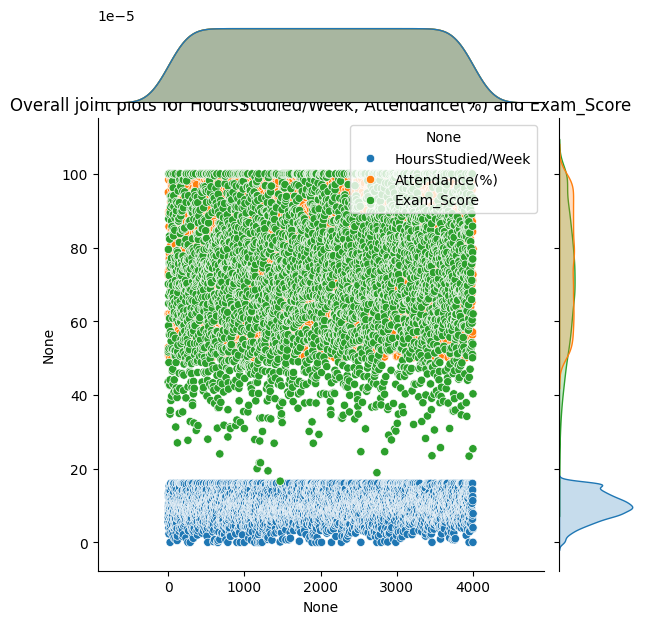

In [559]:
sns.jointplot(df)
plt.title('Overall joint plots for HoursStudied/Week, Attendance(%) and Exam_Score')
plt.show()

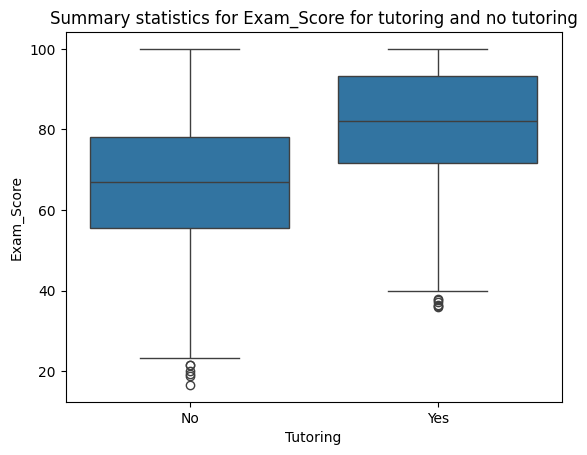

In [560]:
sns.boxplot(x='Tutoring', y='Exam_Score',data=df)
plt.title('Summary statistics for Exam_Score for tutoring and no tutoring')
plt.show()

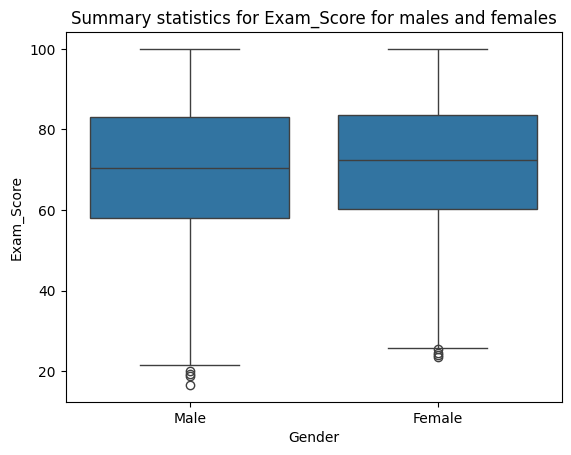

In [561]:
sns.boxplot(x='Gender', y='Exam_Score',data=df)
plt.title('Summary statistics for Exam_Score for males and females')
plt.show()

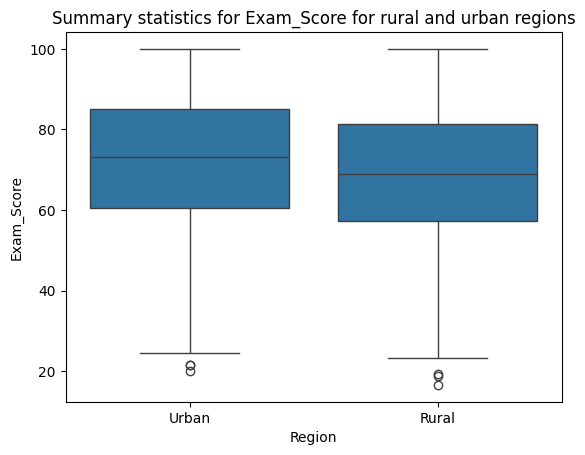

In [562]:
sns.boxplot(x='Region', y='Exam_Score',data=df)
plt.title('Summary statistics for Exam_Score for rural and urban regions')
plt.show()

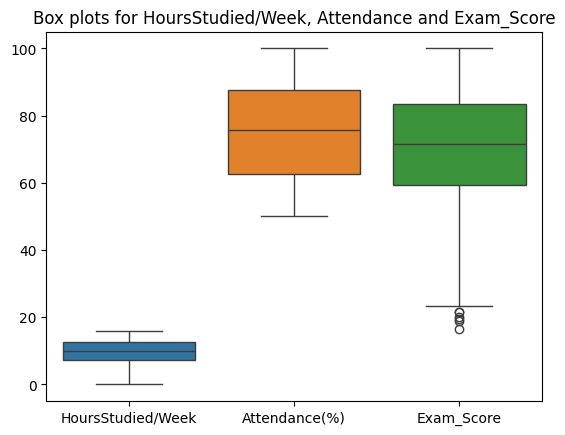

In [563]:
sns.boxplot(df)
plt.title('Box plots for HoursStudied/Week, Attendance and Exam_Score')
plt.show()

In [564]:
# I cannot remove outliers cause they account for situations where we have intelligent and Weak students.